# Exercício — New York Yellow Taxis
## Importação das bibliotecas e leitura do .parquet

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

df = pd.read_parquet('taxis.parquet', engine='fastparquet') #pip install pyarrow para ler parquet

## Limpando as colunas, atualizando o dataframe

In [19]:
df = df[['passenger_count', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
         'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type',
         'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
         'total_amount', 'Airport_fee', 'congestion_surcharge', 'cbd_congestion_fee']]

## Tratando dados desconhecidos, Not a Number

In [20]:
df['passenger_count'] = df['passenger_count'].fillna(1)
df.loc[df['passenger_count'] == 0, 'passenger_count'] = 1
df = df[df['passenger_count'] <= 5]

df['RatecodeID'] = df['RatecodeID'].fillna(99)
df['Airport_fee'] = df['Airport_fee'].fillna(0)
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(2.50)

## Filtrando as colunas do dataframe

In [21]:
df = df[(df['trip_distance'] < 50) & (df['trip_distance'] > 1) & (df['congestion_surcharge'] >= 0.0)
        & (df['fare_amount'] >= 0.0) & (df['fare_amount'] < 500.00) & (df['extra'] >= 0.0) & (df['mta_tax'] >= 0.0)
        & (df['tip_amount'] >= 0.0) & (df['tolls_amount'] >= 0.0) & (df['improvement_surcharge'] >= 0.0)
        & (df['total_amount'] >= 0.0) & (df['Airport_fee'] >= 0.0) & (df['cbd_congestion_fee'] >= 0.0)]

## Limpando os dados e criando colunas adicionais

In [22]:
df['duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df = df[(df['duration_minutes'] > 0) & (df['duration_minutes'] <= 240)]

df['fare_per_mile'] = np.where(df['trip_distance'] > 0, df['total_amount'] / df['trip_distance'], np.nan)
df['fare_per_minute'] = np.where(df['duration_minutes'] > 0, df['total_amount'] / df['duration_minutes'], np.nan)

df['avg_speed_mph'] = df['trip_distance'] / (df['duration_minutes'] / 60)
df = df[(df['avg_speed_mph'] >= 2) & (df['avg_speed_mph'] <= 60)]

df = df[df['total_amount'] < 400]

df.dropna(inplace=True)

fare_per_mile_max = 50
fare_per_minute_max = 10

df = df[~((df['fare_per_mile'] > fare_per_mile_max) | (df['fare_per_minute'] > fare_per_minute_max))]

### Gráfico Scatter da relação entre o 'Valor da Corrida' e 'Distância'

([<matplotlib.axis.XTick at 0x278d87c5dc0>,
 [Text(0, 0, '0$'),
  Text(50, 0, '50$'),
  Text(100, 0, '100$'),
  Text(150, 0, '150$'),
  Text(200, 0, '200$'),
  Text(250, 0, '250$'),
  Text(300, 0, '300$'),
  Text(350, 0, '350$'),
  Text(400, 0, '400$')])

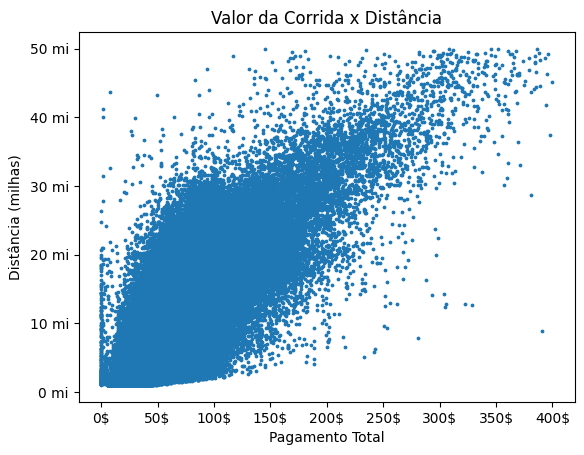

In [ ]:
df.plot.scatter('total_amount', 'trip_distance', 3)
plt.title('Valor da Corrida x Distância')
plt.xlabel('Pagamento Total ($)')
plt.ylabel('Distância (milhas)')
plt.yticks([0, 10, 20, 30, 40, 50], ['0 mi', '10 mi', '20 mi', '30 mi', '40 mi', '50 mi'])
plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400], ['0$', '50$', '100$', '150$', '200$', '250$', '300$', '350$', '400$'])

### Gráfico Scatter da relação entre o 'Valor da Corrida' e 'Duração'

([<matplotlib.axis.XTick at 0x27883f96330>,
 [Text(0, 0, '0$'),
  Text(50, 0, '50$'),
  Text(100, 0, '100$'),
  Text(150, 0, '150$'),
  Text(200, 0, '200$'),
  Text(250, 0, '250$'),
  Text(300, 0, '300$'),
  Text(350, 0, '350$'),
  Text(400, 0, '400$')])

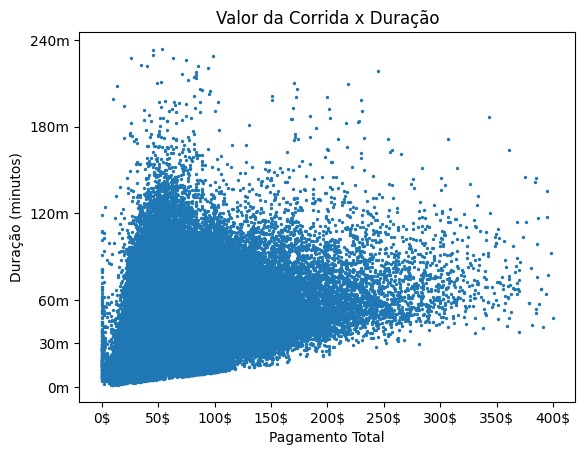

In [ ]:
df.plot.scatter('total_amount', 'duration_minutes', 2)
plt.title('Valor da Corrida x Duração')
plt.xlabel('Pagamento Total ($)')
plt.ylabel('Duração (minutos)')
plt.yticks([0, 30, 60, 120, 180, 240], ['0m', '30m', '60m', '120m', '180m', '240m'])
plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400], ['0$', '50$', '100$', '150$', '200$', '250$', '300$', '350$', '400$'])

### Gráfico Scatter da relação entre a 'Distância' e a 'Duração'

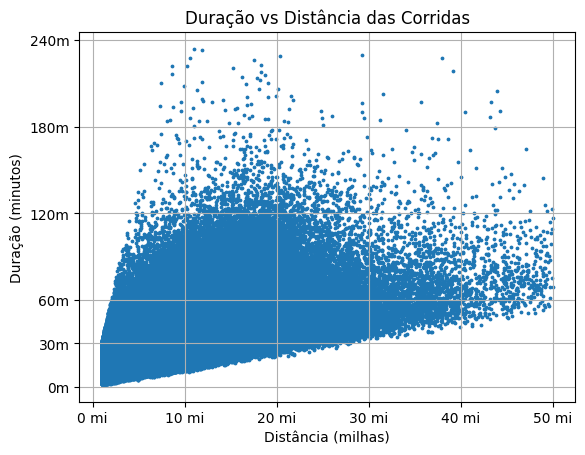

In [33]:
plt.scatter(df['trip_distance'], df['duration_minutes'], 3)
plt.xlabel('Distância (milhas)')
plt.ylabel('Duração (minutos)')
plt.title('Duração vs Distância das Corridas')
plt.yticks([0, 30, 60, 120, 180, 240], ['0m', '30m', '60m', '120m', '180m', '240m'])
plt.xticks([0, 10, 20, 30, 40, 50], ['0 mi', '10 mi', '20 mi', '30 mi', '40 mi', '50 mi'])
plt.grid(True)
plt.show()

### Histograma avaliando os Tipos de Pagamento

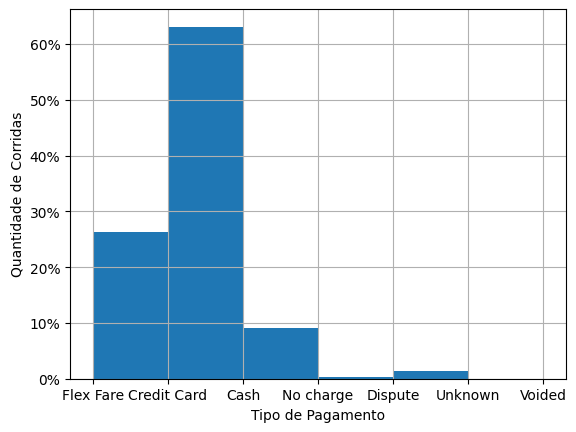

In [44]:
plt.hist(df['payment_type'], bins=[0,1,2,3,4,5,6], density=True)
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Quantidade de Corridas')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Flex Fare', 'Credit Card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided'])
plt.grid(True)

### Histograma avaliando as Durações das Corridas

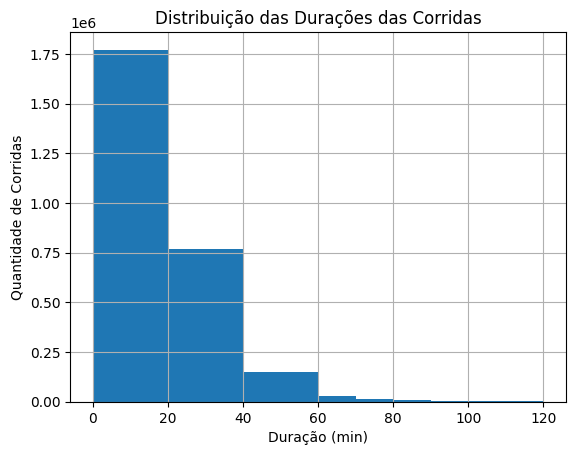

In [ ]:
plt.hist(df['duration_minutes'], bins=[0,20,40,60,70,80,90,100,120])
plt.xlabel('Duração (min)')
plt.ylabel('Quantidade de Corridas')
plt.title('Distribuição das Durações das Corridas')
plt.grid(True)

### Histograma avaliando a Distância das Corridas

Text(0, 0.5, 'Quantidade de Corridas')

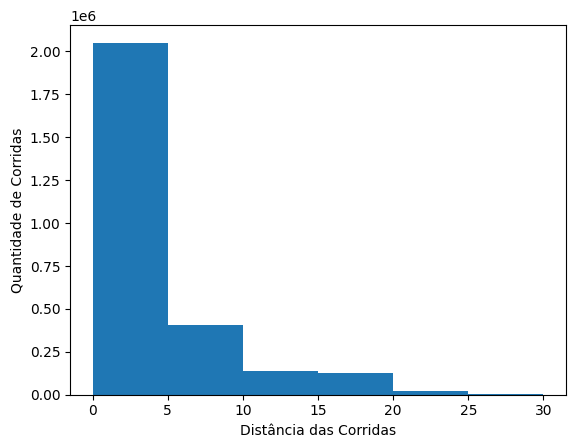

In [ ]:
plt.hist(df['trip_distance'], bins=[0,5,10,15,20,25,30])
plt.xlabel('Distância das Corridas')
plt.ylabel('Quantidade de Corridas')
plt.title('Distribuição das Distâncias das Corridas')
plt.grid(True)

### Histograma avaliando os Valores das Corridas

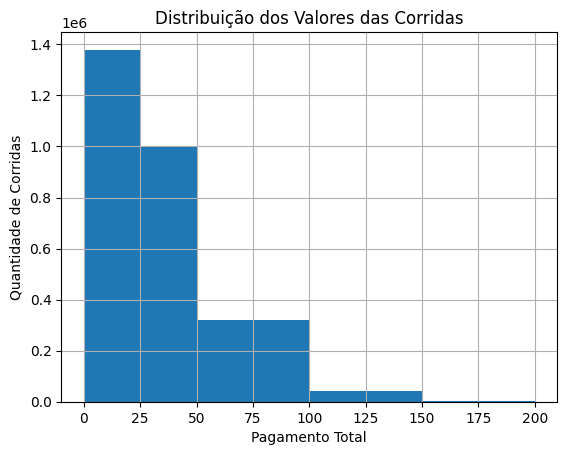

In [46]:
plt.hist(df['total_amount'], bins=[0,25,50,100,150,200])
plt.xlabel('Pagamento Total')
plt.ylabel('Quantidade de Corridas')
plt.title('Distribuição dos Valores das Corridas')
plt.grid(True)

### Boxplot avaliando a relação entre Pagamento e Duração

Text(0, 0.5, 'Quantidade de Corridas')

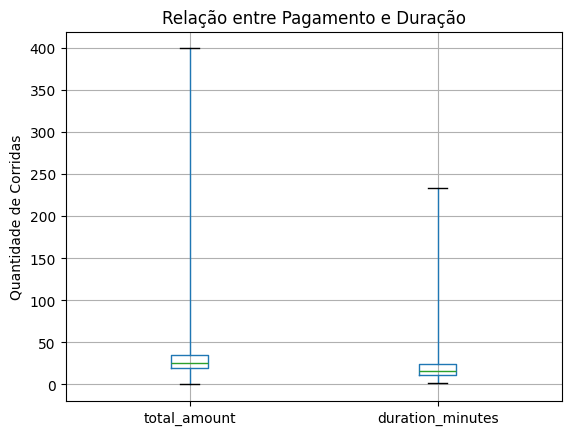

In [31]:
df.boxplot(column = ['total_amount', 'duration_minutes'], whis=25)
plt.title('Relação entre Pagamento e Duração')
plt.ylabel('Quantidade de Corridas')